In [1]:
import sys; sys.path.append('..'); from wwa import *

In [2]:
def get_ranks(fnm):
    
    # load data, mask to just land surface above 60S
    if "monthly" in fnm:
        da = wrap_lon(xr.open_dataset(fnm))
    else:
        da = wrap_lon(decode_times(xr.open_dataset(fnm, decode_times = False)))
    da = da.where(regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(da) == 0)
    da = da.where(da.lat > -60)
    da = da[list(da.data_vars)[0]]

    # compute ranks
    ranks = da.sel(time = slice("1995","2024")).rank("time")
    # original method computed among 1991-2020
#     ranks = xr.concat([da.sel(time = slice("1991","2020")).rank("time")] + 
#                   [xr.concat([da.sel(time = slice("1991","2020")), da.sel(time = str(y))], "time").rank("time").sel(time = str(y)) for y in [2021,2022,2023,2024]], "time")

    # flatten & remove null values for histogram
    ranks_flattened = ranks.stack(xy = ["lat", "lon"]).dropna("xy", "all")
    
    return ranks, ranks_flattened

In [3]:
def compare_ranks(y1 = 2024, y2 = 2023, ax = None, y1_col = "gold", legend_pos = "upper left"):
    
    if not ax: ax = plt.gca()
        
    rmax = int(ranks_flattened.max().values)
        
    if y2 is not None:
        ax.hist(ranks_flattened.sel(time = str(y2)).squeeze(drop = True), density = True, bins = range(1,rmax+1), alpha = 0.5, label = str(y2))
        y1_col = "none"
        
    ax.hist(ranks_flattened.sel(time = str(y1)).squeeze(drop = True), density = True, bins = range(1,rmax+1), edgecolor = "k", facecolor = y1_col, label = str(y1), color = y1_col)

    ax.axhline(y = 1/rmax, color = "darkred", ls = "--")
    ax.margins(x = 0)
    ax.legend(loc = legend_pos)

# rx5day

In [32]:
ranks, ranks_flattened = get_ranks("data/era5_prcp_daily_1_max_30_5v.nc")

Text(0.5, 0.95, 'Rank of rx5day among 1995-2024')

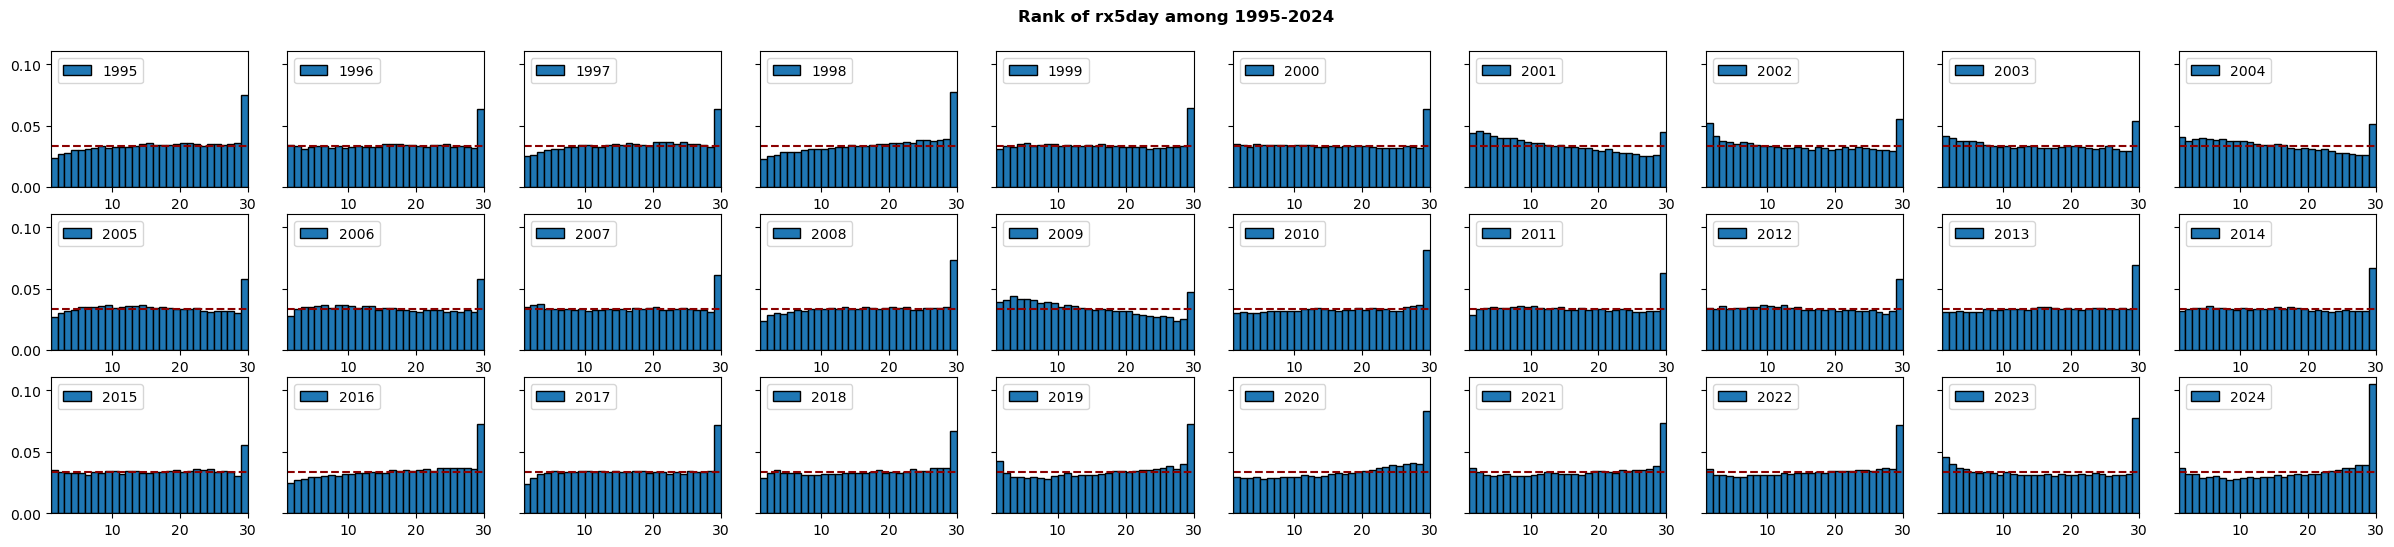

In [66]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
[compare_ranks(range(1995,2025)[i], None, ax = axs.flatten()[i], y1_col = "tab:blue") for i in range(min(nc*nr, 34))]
if nc*nr > 34: 
    for i in range(34, nc*nr): axs.flatten()[i].set_axis_off()
fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.95)

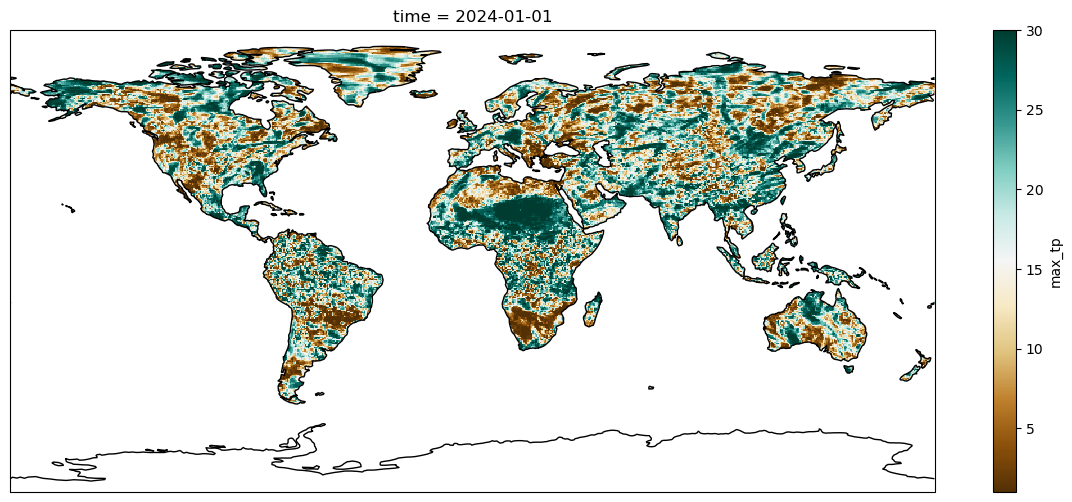

In [67]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "BrBG")
ax.coastlines()

## Alternative projection

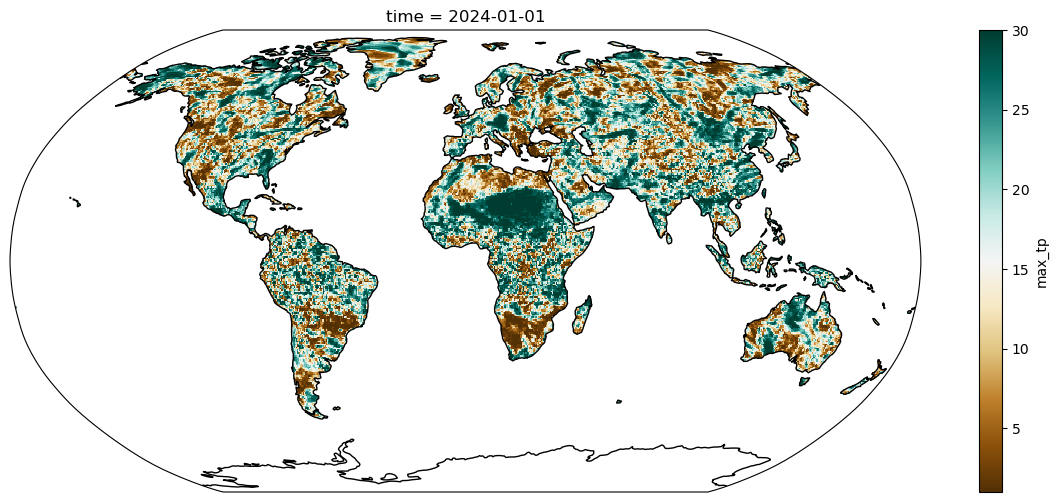

In [43]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.Robinson()}, dpi = 100)
cbar = ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "BrBG", transform = cartopy.crs.PlateCarree())
ax.coastlines()

In [34]:
fig = ranks.sel(time = "2024").plot(vmin = 1, vmax = 30, cmap = "BrBG", subplot_kws = {"projection" : cartopy.crs.Robinson()})

In [37]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.Robinson()}, dpi = 100)
ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "BrBG")
ax.coastlines()

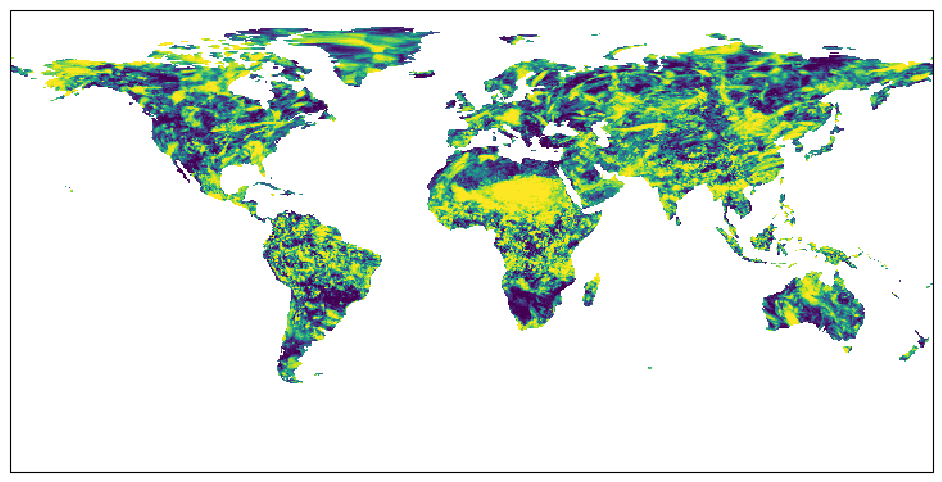

In [41]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.Robinson()}, dpi = 100)
ax.pcolormesh(ranks.lon, ranks.lat, ranks.sel(time = "2024").squeeze(drop = True), transform = cartopy.crs.Robinson())

# tx1x

In [4]:
ranks, ranks_flattened = get_ranks("data/era5_tmax_daily_1_max_50.nc")

Text(0.5, 0.95, 'Rank among 1995-2024')

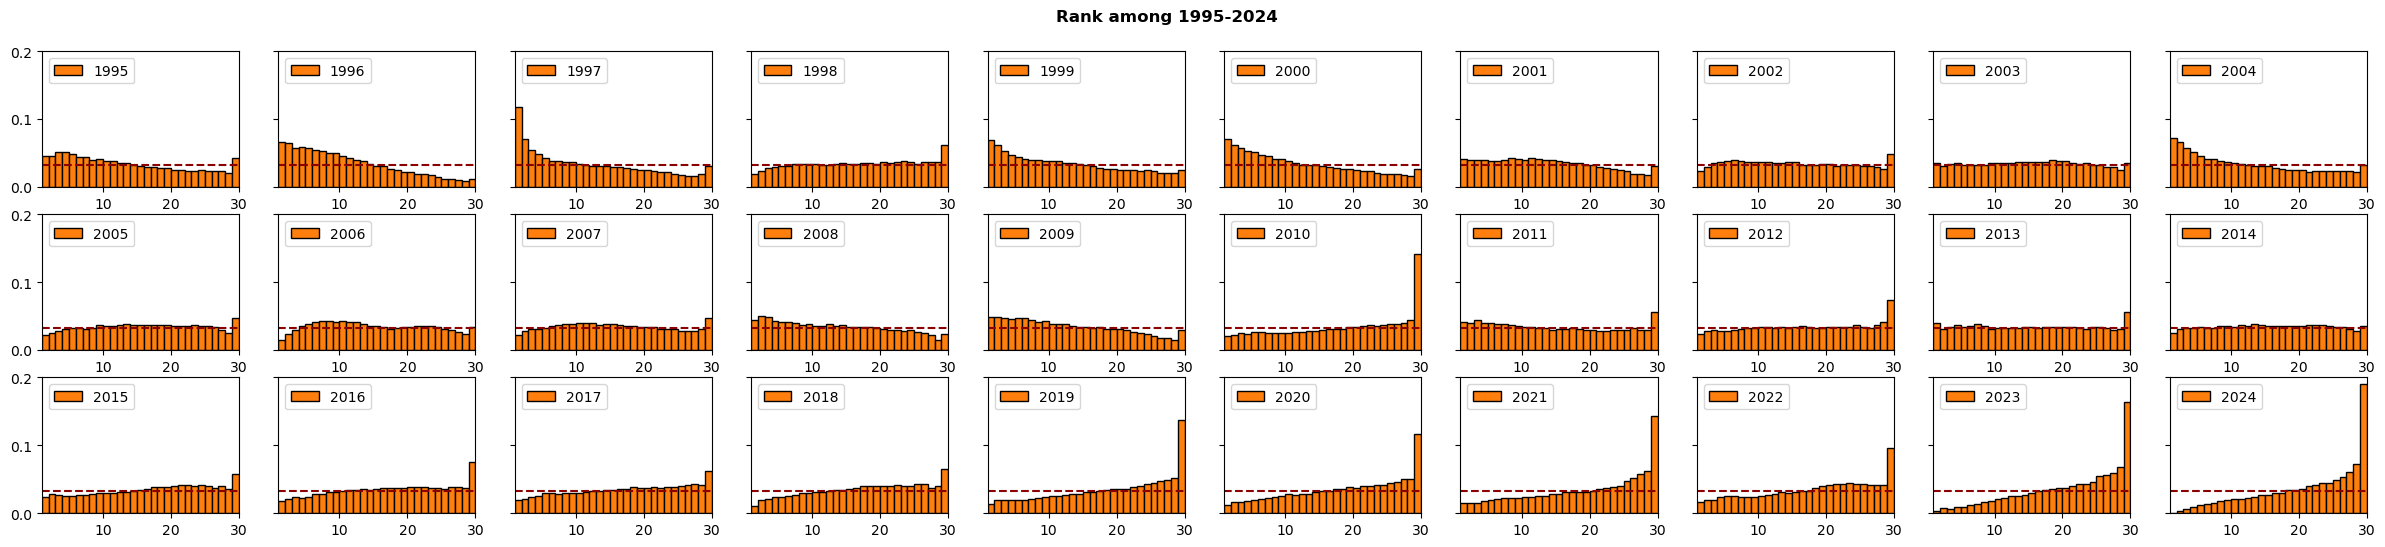

In [5]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
[compare_ranks(range(1995,2025)[i], None, ax = axs.flatten()[i], y1_col = "tab:orange") for i in range(min(nc*nr, 34))]
if nc*nr > 34: 
    for i in range(34, nc*nr): axs.flatten()[i].set_axis_off()
fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.95)

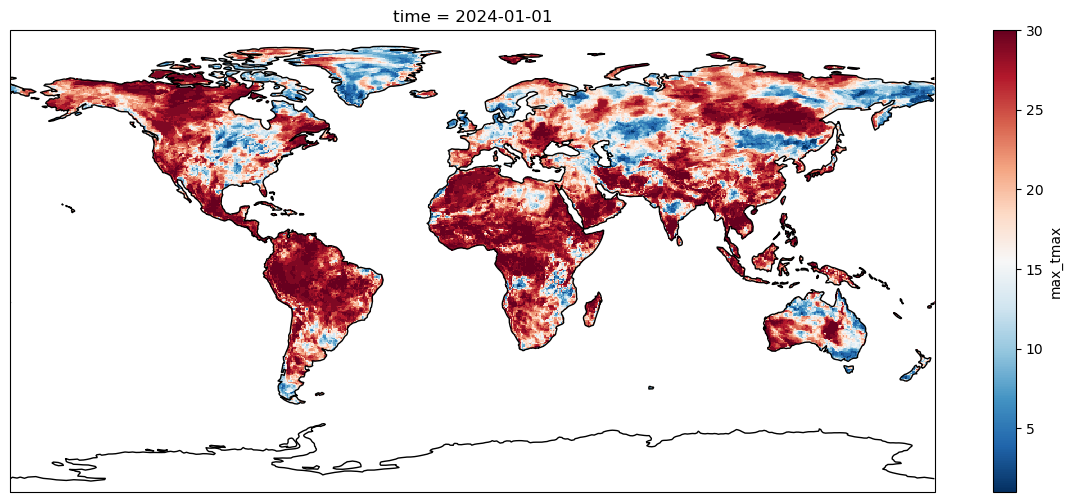

In [6]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "RdBu_r")
ax.coastlines()

# tn1x

In [7]:
ranks, ranks_flattened = get_ranks("data/era5_tmin_daily_1_max_30.nc")

Text(0.5, 0.95, 'Rank among 1995-2024')

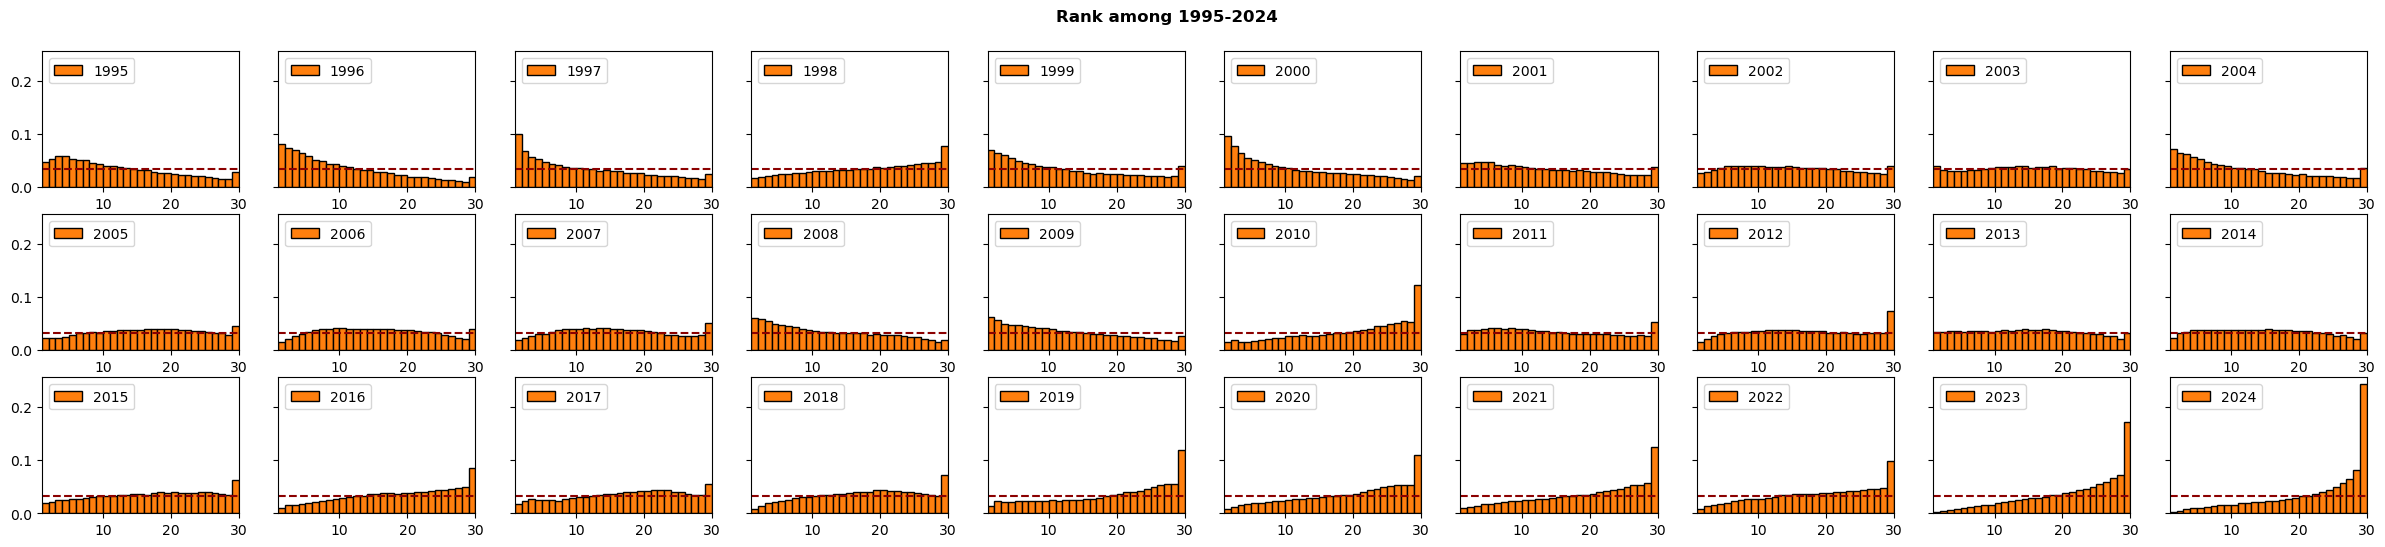

In [8]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
[compare_ranks(range(1995,2025)[i], None, ax = axs.flatten()[i], y1_col = "tab:orange") for i in range(min(nc*nr, 34))]
if nc*nr > 34: 
    for i in range(34, nc*nr): axs.flatten()[i].set_axis_off()
fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.95)

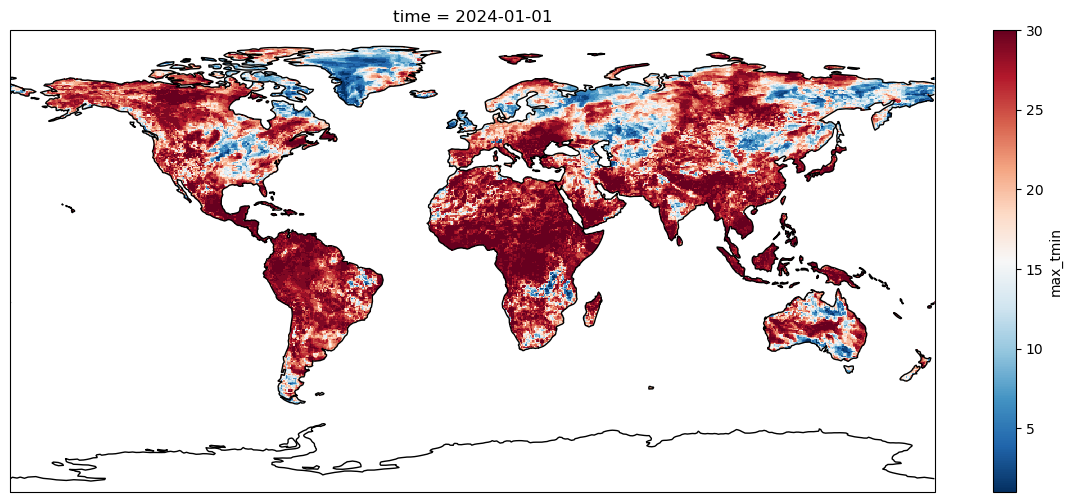

In [9]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "RdBu_r")
ax.coastlines()

# Monthly mean temperatures

In [ ]:
# # save mothly data as separate files
# da = decode_times(xr.open_dataset("data/era5_t2m_daily_12_mean_30.nc", decode_times = False))

# for i in range(12):
#     da_m = da.groupby("time.month")[i+1]
#     da_m.to_netcdf("data/era5_t2m_monthly_"+str(i+1).rjust(2, "0")+"_mean.nc")

In [10]:
ranks, ranks_flattened = get_ranks("data/era5_t2m_monthly_04_mean.nc")

Text(0.5, 0.95, 'Rank among 1995-2024')

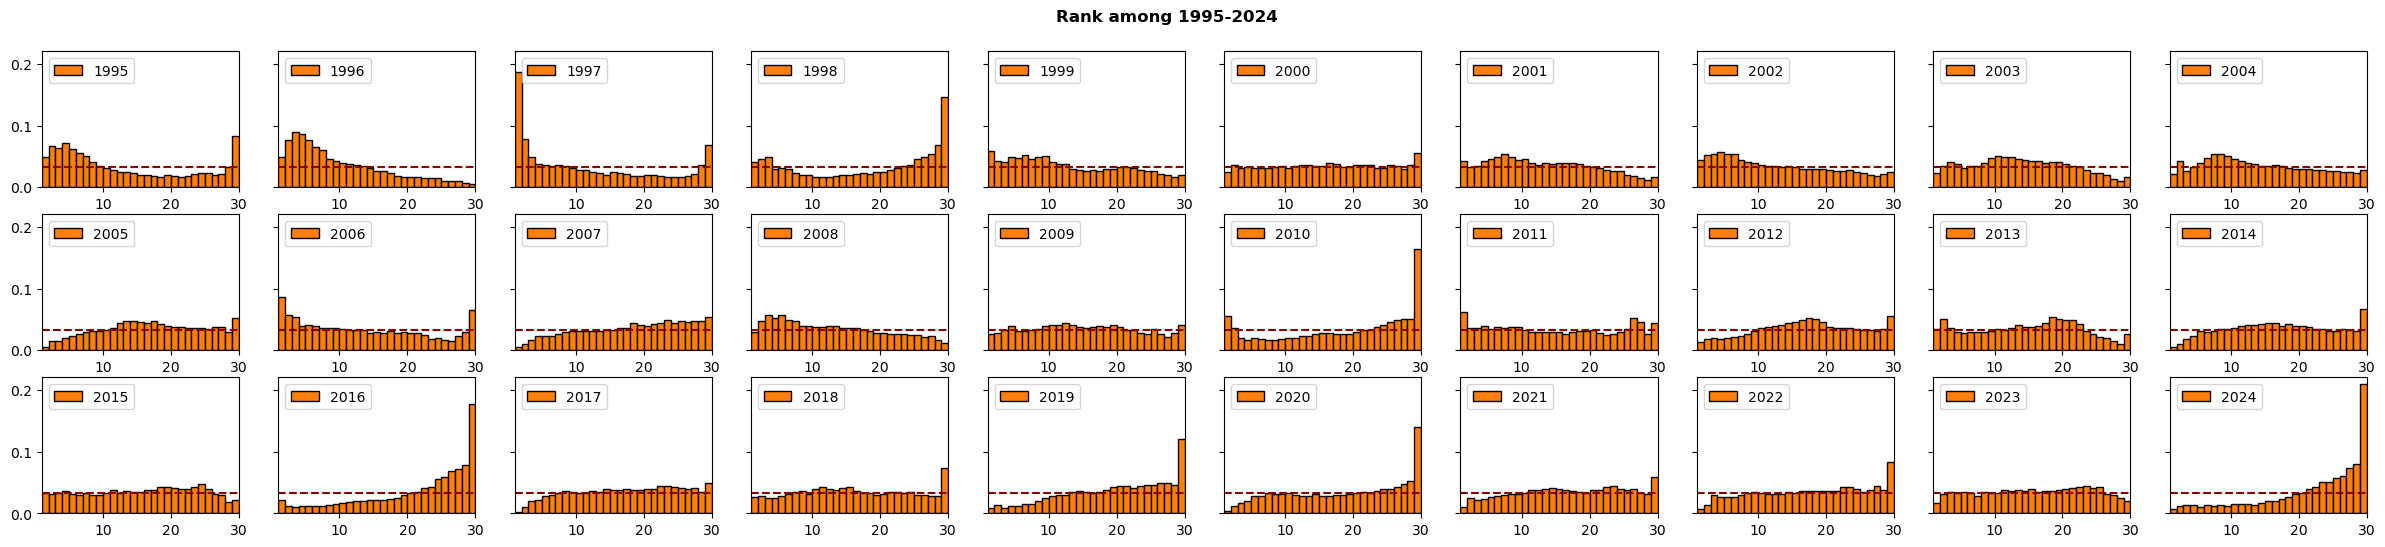

In [110]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
[compare_ranks(range(1995,2025)[i], None, ax = axs.flatten()[i], y1_col = "tab:orange") for i in range(min(nc*nr, 34))]
if nc*nr > 34: 
    for i in range(34, nc*nr): axs.flatten()[i].set_axis_off()
fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.95)

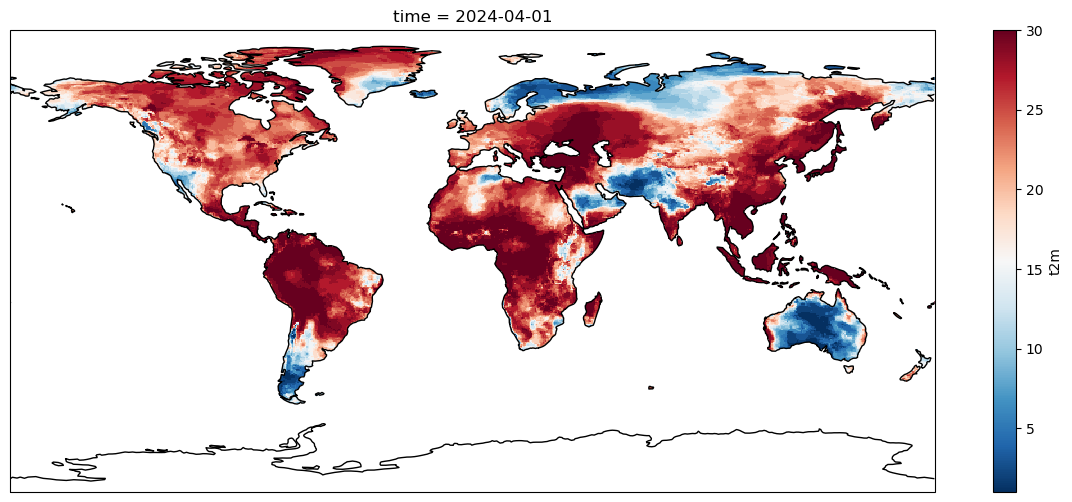

In [111]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "RdBu_r")
ax.coastlines()

## Maps of all months

In [18]:
da = wrap_lon(decode_times(xr.open_dataset("data/era5_t2m_daily_12_mean_30.nc", decode_times = False))).t2m
da = da.where(regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(da) == 0)
da = da.where(da.lat > -60)

In [26]:
ranks_2024 = xr.concat([da.sel(time = slice("1995","2024")).groupby("time.month")[i+1].rank("time").sel(time = "2024") for i in range(12)], "time")

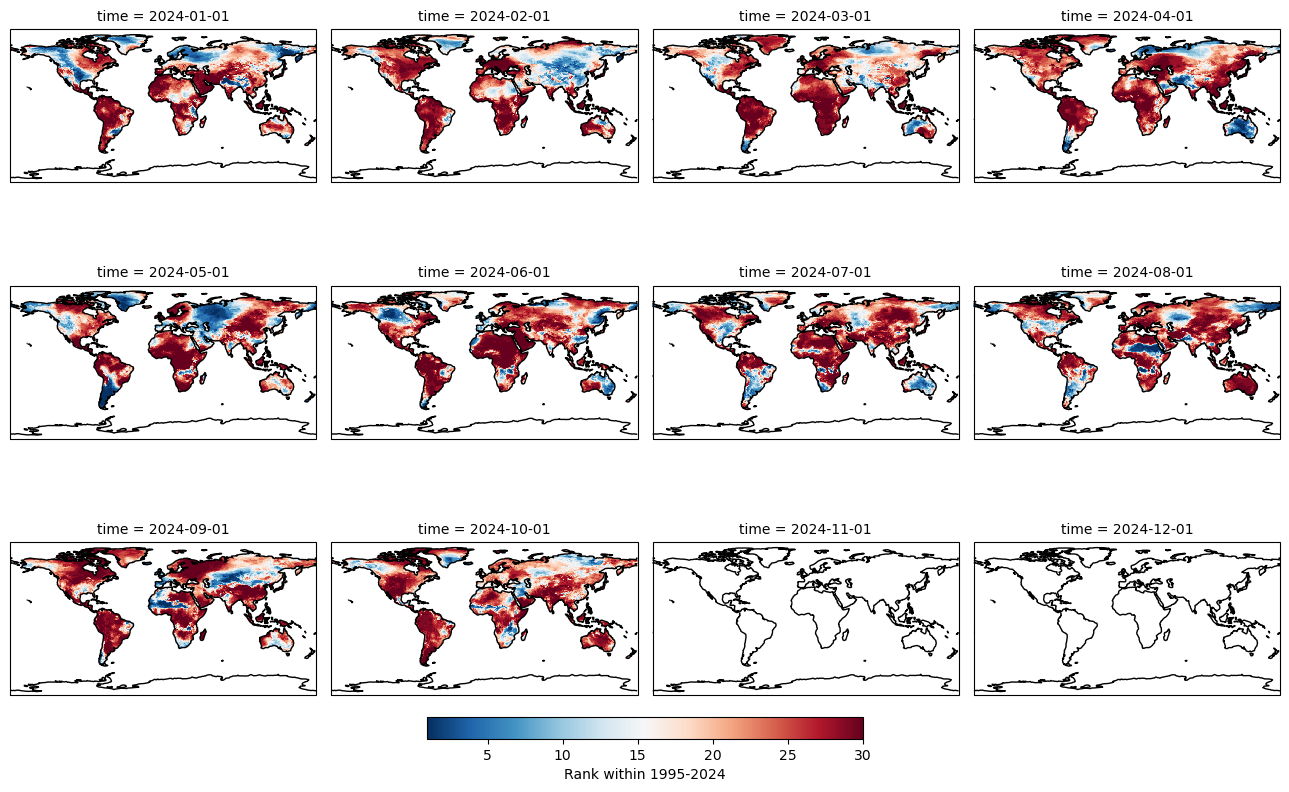

In [30]:
fig = ranks_2024.plot(col = "time", col_wrap = 4, cmap = "RdBu_r", subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, 
                cbar_kwargs = {"location" : "bottom", "fraction" : 0.025, "pad" : 0.025, "label" : "Rank within 1995-2024"})

for ax in fig.axs.flat:
    ax.coastlines()

## Monthly pr

In [62]:
da = wrap_lon(xr.open_dataset("data/era5_tp-pev_monthly.nc")).rename(latitude = "lat", longitude ="lon", valid_time = "time").sel(time = slice("1995", "2024"))
da = da.where(regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(da) == 0)
da = da.where(da.lat > -60)

In [63]:
da = da.assign_coords(year = ("time", da.time.dt.year.data), month = ("time", da.time.dt.month.data))
da = da.set_index(time = ("year", "month")).unstack("time")

In [64]:
# average over 2x2 grid cell to speed things up
da = da.coarsen(dim = {"lon" : 2, "lat" : 2}, boundary = "trim").mean()

In [65]:
ranks = da.rank("year")

In [66]:
ranks_flattened = ranks.stack(xy = ["lat", "lon"]).dropna("xy", "all").load()

Text(0.5, 0.96, 'Rank among 1995-2024')

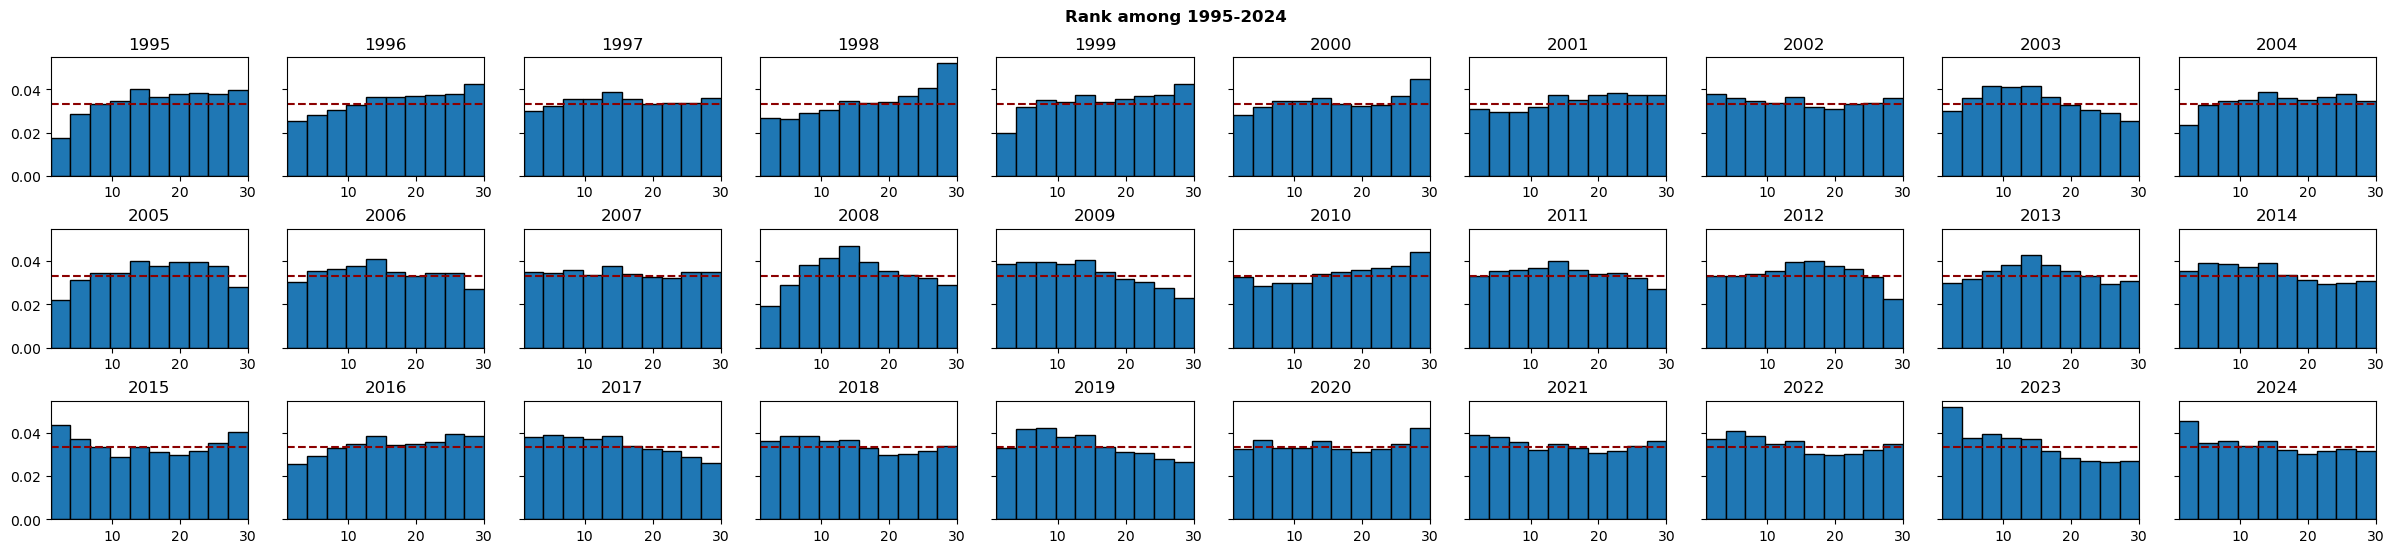

In [67]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
plt.subplots_adjust(hspace = 0.45)

for i in range(30):
    y = ranks.year.values[i]
    ax = axs.flatten()[i]
    ax.hist(ranks_flattened.tp.sel(month = 7, year = y), facecolor = "tab:blue", edgecolor = "k", density = True)
    ax.set_title(y)
    ax.axhline(y = 1/30, color = "darkred", ls = "--")
    ax.margins(x = 0)

fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.96)

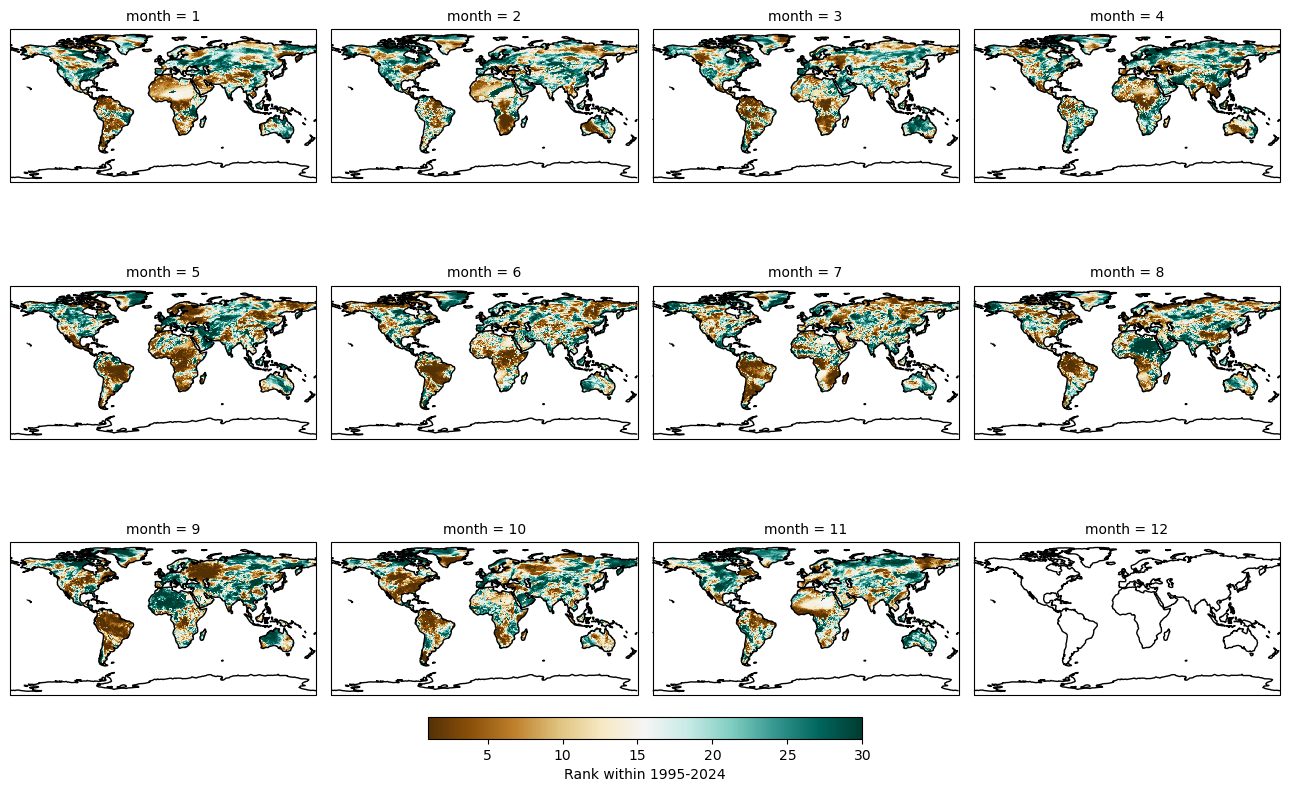

In [68]:
fig = ranks.tp.sel(year = 2024).plot(col = "month", col_wrap = 4, cmap = "BrBG", subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, 
                cbar_kwargs = {"location" : "bottom", "fraction" : 0.025, "pad" : 0.025, "label" : "Rank within 1995-2024"})

for ax in fig.axs.flat:
    ax.coastlines()

In [70]:
eff_pr = da.tp - da.pev

In [71]:
ranks_effpr = eff_pr.rank("year")
ranks_effpr_flattened = ranks_effpr.stack(xy = ["lat", "lon"]).dropna("xy", "all").load()

Text(0.5, 0.96, 'Rank among 1995-2024')

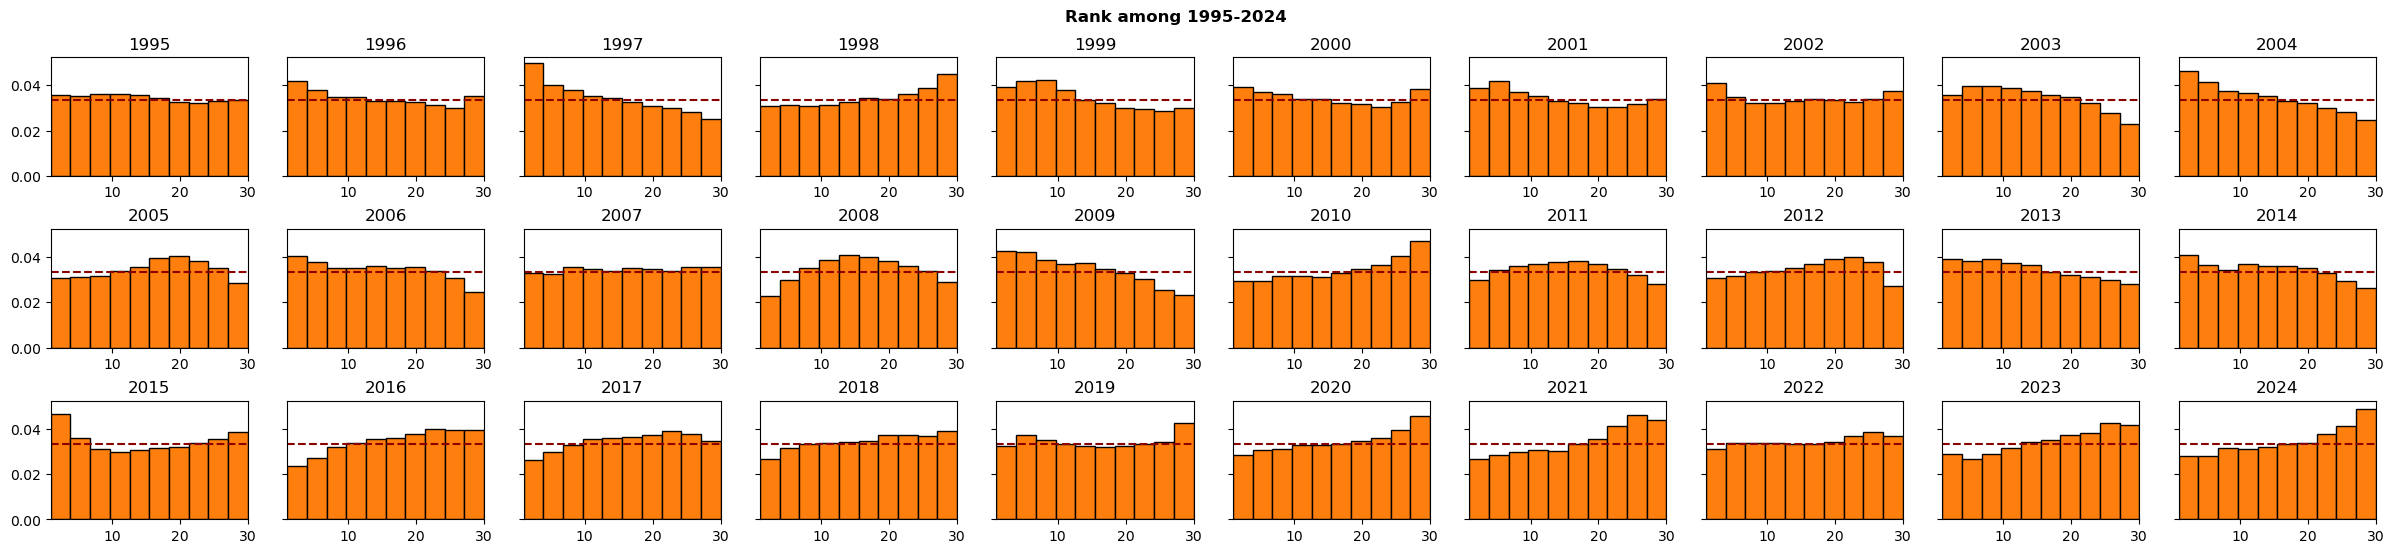

In [73]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
plt.subplots_adjust(hspace = 0.45)

for i in range(30):
    y = ranks.year.values[i]
    ax = axs.flatten()[i]
    ax.hist(ranks_effpr_flattened.sel(month = 7, year = y), facecolor = "tab:orange", edgecolor = "k", density = True)
    ax.set_title(y)
    ax.axhline(y = 1/30, color = "darkred", ls = "--")
    ax.margins(x = 0)

fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.96)

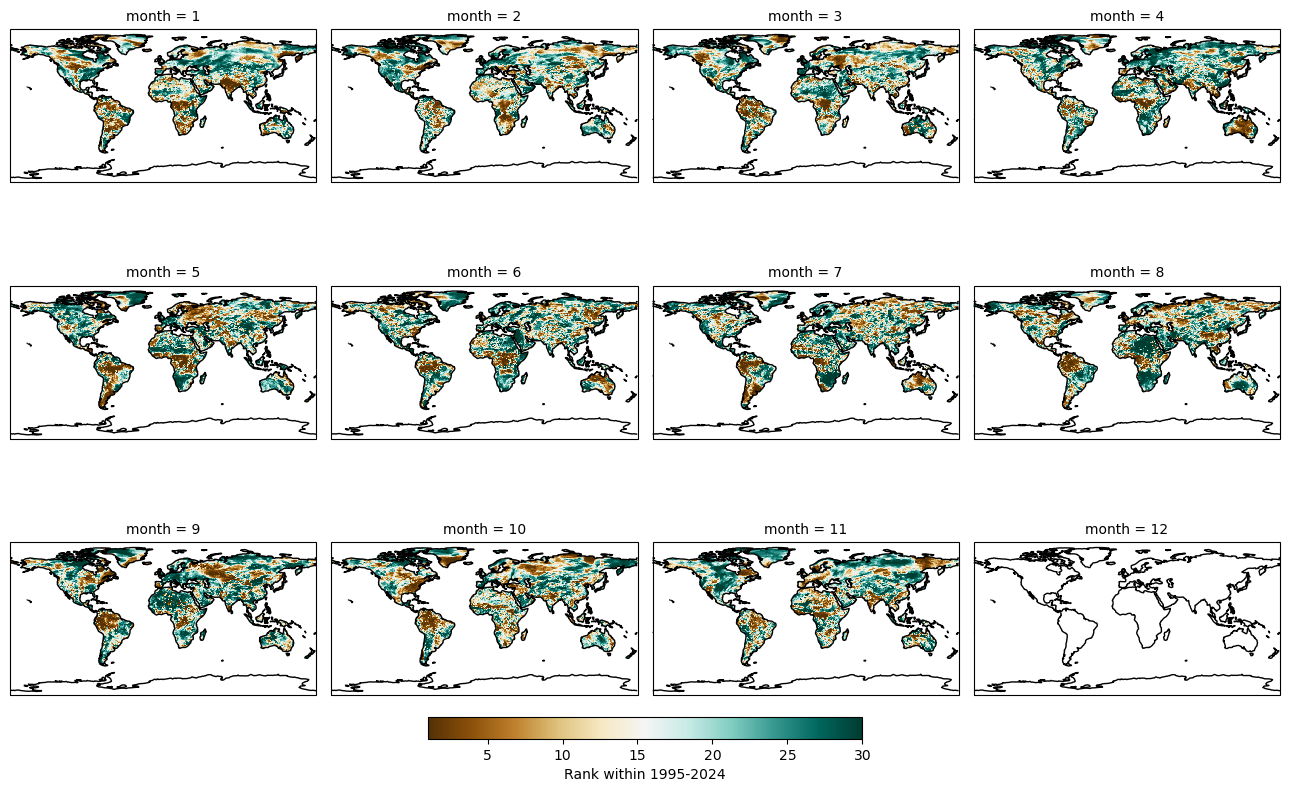

In [74]:
fig = ranks_effpr.sel(year = 2024).plot(col = "month", col_wrap = 4, cmap = "BrBG", subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, 
                cbar_kwargs = {"location" : "bottom", "fraction" : 0.025, "pad" : 0.025, "label" : "Rank within 1995-2024"})

for ax in fig.axs.flat:
    ax.coastlines()